# Geoid Anomaly Grid
**Description:**  Gridded geoid heights from EIGEN-6C4 originally at a 10 arc-min resolution. Can be added to a ellipsoid-referenced elevation grid to convert it to be referenced to the geoid. 

**Dataset:** 

Uieda, Leonardo. “Fatiando a Terra Data: Earth - Geoid Height Grid at 10 Arc-Minute Resolution.” Zenodo, January 20, 2022. https://doi.org/10.5281/zenodo.5882205.

**Associated paper:** 

Förste, Christoph, Sean.L. Bruinsma, Oleg Abrikosov, Jean-Michel Lemoine, Jean Charles Marty, Frank Flechtner, G. Balmino, F. Barthelmes, and R. Biancale. “EIGEN-6C4 The Latest Combined Global Gravity Field Model Including GOCE Data up to Degree and Order 2190 of GFZ Potsdam and GRGS Toulouse.” Application/octet-stream,application/octet-stream,application/zip. GFZ Data Services, 2014. https://doi.org/10.5880/ICGEM.2015.1.


In [1]:
%%capture
%load_ext autoreload
%autoreload 2

from polartoolkit import fetch, maps, utils

In [2]:
data = fetch.geoid(
    hemisphere="south"
    # available options
    # region,
    # spacing,
    # registration ("g" for gridline or "p" for pixel),
)
data

<xarray.DataArray 'z' (y: 1401, x: 1401)> Size: 16MB
array([[-15.44726849, -15.45757771, -15.47042084, ..., -19.3550663 ,
        -19.4024086 , -19.46065521],
       [-15.47364902, -15.47709751, -15.48485947, ..., -19.37335587,
        -19.42211342, -19.48238754],
       [-15.51336765, -15.51060295, -15.50846672, ..., -19.39763451,
        -19.45119286, -19.51390457],
       ...,
       [ -3.04778719,  -3.02410626,  -3.00001216, ...,  46.07664871,
         46.20534897,  46.33837509],
       [ -3.02213597,  -2.99973488,  -2.97389078, ...,  46.05263519,
         46.18078232,  46.31394958],
       [ -3.00159287,  -2.98255706,  -2.9568212 , ...,  46.02333069,
         46.15188599,  46.28530121]])
Coordinates:
  * y        (y) float64 11kB -3.5e+06 -3.495e+06 ... 3.495e+06 3.5e+06
  * x        (x) float64 11kB -3.5e+06 -3.495e+06 ... 3.495e+06 3.5e+06
Attributes:
    Conventions:   CF-1.7
    title:         
    history:       gmt grdsample @GMTAPI@-S-I-G-M-G-N-000000 -G@GMTAPI@-S-O-G...
    description:   
    long_name:     z
    actual_range:  [-66.12410736  52.22008133]

In [3]:
_ = utils.get_grid_info(data, print_info=True)

grid spacing: 5000.0 m
grid region: (-3500000.0, 3500000.0, -3500000.0, 3500000.0)
grid zmin: -66.1241073608
grid zmax: 52.2200813293
grid registration: g


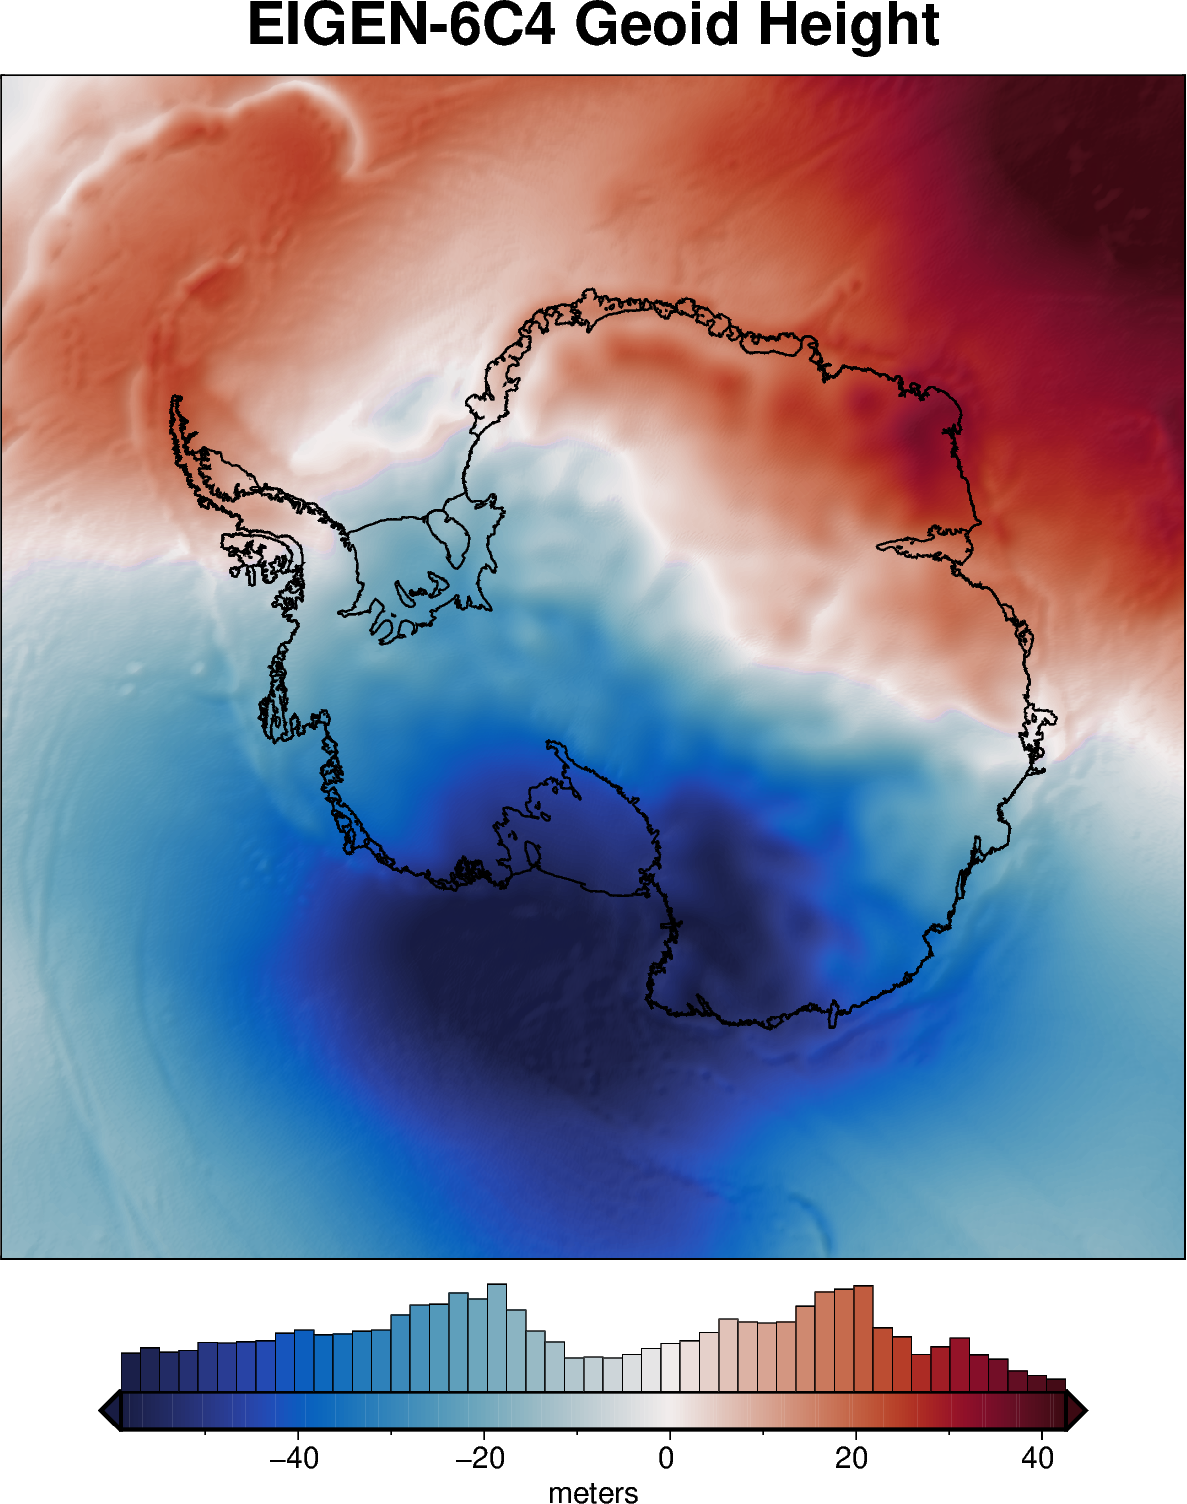

In [4]:
fig = maps.plot_grd(
    data,
    title="EIGEN-6C4 Geoid Height",
    cmap="balance+h0",
    coast=True,
    cbar_label="meters",
    hist=True,
    robust=True,
    hemisphere="south",
    shading="+nt.1",
)

fig.show(dpi=200)